# 1. Import related packages

In [0]:
%matplotlib inline
import time
import keras
import warnings
import numpy as np  
import pandas as pd    
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.layers import Input, Dense
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_mldata
from keras.models import Sequential, Model
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD  
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC   


 # 2. Road data of MNIST 

## 1.1 Road the raw data

In [4]:
# load the fashion_mnist data and split it into train and test
(x_training, y_training), (x_test, y_test) = fashion_mnist.load_data()
# make a copy of label
label_train = y_training
label_test = y_test

4423680/4422102 [==============================] - 0s 0us/step


## 1.2 Reshape the raw data

In [0]:
# reshape data to 784 dimension
# nomalization
original_data = np.reshape(x_training, (x_training.shape[0], x_training.shape[1] * x_training.shape[2]))
data_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2])).astype('float32') / 255.
data_train = original_data.astype('float32') / 255

# 3. Methods of dimensionality reduction

## 3.1 PCA data dimensionality reduction

### Implement PCA dimensionality reduction

In [0]:
def pca_reduction(data_train, data_test,percentage): # PCA function
    warnings.filterwarnings('ignore')
    new_data_train = data_train
    new_data_test = data_test
    new_pca = PCA(percentage)  # retain how much similarity
    new_data_train = new_pca.fit_transform(new_data_train)
    new_data_test = new_pca.transform(new_data_test)
    
    return new_data_train, new_data_test

### 3.1.1 mean square error 

In [0]:
def pca_explainedVariance(percentage, raw_data): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    components = pca.fit_transform(raw_data)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

### 3.1.2 Two and three-D representation of PCA

In [0]:
def two_d_pca(): # show 3d of pca
    feat_cols = [ 'pixel'+str(i) for i in range(data_train.shape[1]) ]
    df = pd.DataFrame(data_train,columns=feat_cols)
    df['y'] = label_train
    rndperm = np.random.permutation(df.shape[0])

    New_Pca = PCA(n_components=3)
    new_pca_result = New_Pca.fit_transform(data_train)

    df['pca-one'] = new_pca_result[:,0]
    df['pca-two'] = new_pca_result[:,1] 
    df['pca-three'] = new_pca_result[:,2]
    plt.figure(figsize=(10,6))

    sns.scatterplot(
      x="pca-one", y="pca-two",
      hue="y",
      palette=sns.color_palette("hls", 10),
      data=df.loc[rndperm,:],
      legend="full",
      alpha=0.3
  )

In [0]:
def three_d_pca(): #show 3d of pca
    feat_cols = [ 'pixel'+str(i) for i in range(data_train.shape[1]) ]
    df = pd.DataFrame(data_train,columns=feat_cols)
    df['y'] = label_train
    rndperm = np.random.permutation(df.shape[0])
    
    New_Pca = PCA(n_components=3)
    new_pca_result = New_Pca.fit_transform(data_train)
    df['pca-one'] = new_pca_result[:,0]
    df['pca-two'] = new_pca_result[:,1] 
    df['pca-three'] = new_pca_result[:,2]
    ax = plt.figure(figsize=(10,6)).gca(projection='3d')
    ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
    )
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    plt.show()

### 3.1.4 Showing Graph of Explained Variance vs Number of Principal Components

In [0]:
def show_graph_EV():
    pca = PCA()
    pca.fit(original_data)
    tot = sum(pca.explained_variance_)
    var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
    cum_var_exp = np.cumsum(var_exp)
    
    plt.figure(figsize=(10, 5))
    plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.title('Cumulative Explained Variance as a Function of the Number of Components')
    plt.ylabel('Cumulative Explained variance(%)')
    plt.xlabel('Principal components')
    plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
    plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
    plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
    plt.legend(loc='best')
    plt.show()

### 3.1.5 Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [0]:
def show_diff_graph():
    pca = PCA()
    pca.fit(original_data)
    tot = sum(pca.explained_variance_)
    var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
    cum_var_exp = np.cumsum(var_exp)
    
    componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]
    
    plt.figure(figsize=(20,4));

    # Original Image (784 components)
    plt.subplot(1, 5, 1);
    plt.imshow(original_data[5].reshape(28,28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('784 Components', fontsize = 12)
    plt.title('Original Image', fontsize = 14);

    # 459 principal components
    plt.subplot(1, 5, 2);
    plt.imshow(pca_explainedVariance(.99, original_data)[5].reshape(28, 28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('459 Components', fontsize = 12)
    plt.title('99% of Explained Variance', fontsize = 14);

    # 188 principal components
    plt.subplot(1, 5, 3);
    plt.imshow(pca_explainedVariance(.95, original_data)[5].reshape(28, 28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('188 Components', fontsize = 12)
    plt.title('95% of Explained Variance', fontsize = 14);

    # 84 principal components
    plt.subplot(1, 5, 4);
    plt.imshow(pca_explainedVariance(.90,original_data)[5].reshape(28, 28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('84 Components', fontsize = 12)
    plt.title('90% of Explained Variance', fontsize = 14);

    # 43 principal components
    plt.subplot(1, 5, 5);
    plt.imshow(pca_explainedVariance(.85, original_data)[5].reshape(28, 28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('43 Components', fontsize = 12)
    plt.title('85% of Explained Variance', fontsize = 14);
    

## 3.2 SVD data dimensionality reduction

### Implement SVD dimensionality reduction

In [0]:
def svd_reduction(train,test, num): # SVD function
    svd = TruncatedSVD(n_components= num, algorithm='randomized')
    svd_data_train = svd.fit_transform(train)
    svd_data_test = svd.transform(test)
    return svd_data_train,svd_data_test,svd

### 3.2.1 Calculating similarity of raw data(image)

In [0]:
def similarity_data(svd): 
    similarity  = 0
    variance_ratio = svd.explained_variance_ratio_
    for i in range(len(variance_ratio)):
        similarity  += variance_ratio[i]
    
    return  similarity 

### 3.2.2 mean square error 

In [0]:
def svd_explainedVariance(num, raw_data): 
    # percentage should be a decimal from 0 to 1 
    svd = TruncatedSVD(n_components=num, algorithm='randomized')
    components = svd.fit_transform(raw_data)
    svd_data_reconst = svd.inverse_transform(components)
    return svd_data_reconst

### 3.2.3 Two and three-D representation of SVD

In [0]:
def two_d_svd(): # show 2D DATA after SVD 
    feat_cols = [ 'pixel'+str(i) for i in range(data_train.shape[1]) ]
    df = pd.DataFrame(data_train,columns=feat_cols)
    df['y'] = label_train
    rndperm = np.random.permutation(df.shape[0])
    New_Svd = TruncatedSVD(n_components=3, algorithm='randomized')
    new_svd_result = New_Svd.fit_transform(data_train)
    df['svd-one'] = new_svd_result[:,0]
    df['svd-two'] = new_svd_result[:,1] 
    df['svd-three'] = new_svd_result[:,2]
    plt.figure(figsize=(16,10))
    
    sns.scatterplot(
        x="svd-one", y="svd-two",
        hue="y",
        palette=sns.color_palette("hls", 10),
        data=df.loc[rndperm,:],
        legend="full",
        alpha=0.3
    )

In [0]:
def three_d_svd():  # show 3D DATA after SVD 
    feat_cols = [ 'pixel'+str(i) for i in range(data_train.shape[1]) ]
    df = pd.DataFrame(data_train,columns=feat_cols)
    df['y'] = label_train
    rndperm = np.random.permutation(df.shape[0])
    New_Svd = TruncatedSVD(n_components=3, algorithm='randomized')
    new_svd_result = New_Svd.fit_transform(data_train)
    df['svd-one'] = new_svd_result[:,0]
    df['svd-two'] = new_svd_result[:,1] 
    df['svd-three'] = new_svd_result[:,2]
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
    xs=df.loc[rndperm,:]["svd-one"], 
    ys=df.loc[rndperm,:]["svd-two"], 
    zs=df.loc[rndperm,:]["svd-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
    )
    ax.set_xlabel('svd-one')
    ax.set_ylabel('svd-two')
    ax.set_zlabel('svd-three')
    plt.show()

### 3.2.4 Compare new Principal Components with Original data

In [0]:
def compare_data():
    plt.figure(figsize=(8,4));

    # Original Image
    plt.subplot(1, 2, 1);
    plt.imshow(original_data[0].reshape(28,28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('784 components', fontsize = 14)
    plt.title('Original Image', fontsize = 20);

    # 84 principal components
    plt.subplot(1, 2, 2);
    plt.imshow(svd_explainedVariance(84,original_data)[0].reshape(28, 28),
                  interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('84 components', fontsize = 14)
    plt.title('Dimensionalized Image', fontsize = 20)
    plt.show()

## 3.3 Autoencoders data dimensionality reduction

### Implement autoencoders with different dimensions

In [0]:
def autoencoder_reduction(X_data,y_data,num):
    # minmax_normalized
    X_data = X_data - 0.5  
    # minmax_normalized
    y_data = y_data - 0.5         
    X_data = X_data.reshape((X_data.shape[0], -1))
    y_data = y_data.reshape((y_data.shape[0], -1))


    encoding_dim = num
    
    # input placeholder
    input_img = Input(shape=(784,))

    # encoder layers
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(10, activation='relu')(encoded)
    encoder_output = Dense(encoding_dim)(encoded)

    # decoder layers
    decoded = Dense(10, activation='relu')(encoder_output)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(784, activation='tanh')(decoded)

    # construct the autoencoder model
    autoencoder = Model(input=input_img, output=decoded)

    # construct the encoder model for plotting
    encoder = Model(input=input_img, output=encoder_output)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(X_data, X_data,
                    nb_epoch = 20,
                    batch_size=256,
                    shuffle=True)
    
    encoded_test = encoder.predict(y_data)
    encoded_train = encoder.predict(X_data)
    
    plt.figure(figsize=(10,6))
    plt.scatter(encoded_train[:, 0], encoded_train[:, 1], c=label_train)

    plt.colorbar()
    plt.show()
    
    return encoded_train, encoded_test

# 4. KNN to the transformed data and K-Fold Cross Validation

In [0]:
def knn_valid(data,label): # validation function
    knn_time_start = time.time()
    k_range = range(1,20, 2)  
    k_scores = []    
    for k in k_range:  
        knn = KNeighborsClassifier(n_neighbors=k,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=5)  
        scores = cross_val_score(knn, data, label, cv=10, scoring='accuracy')  
        k_scores.append(scores.mean())  
    print('validation done! Time elapsed: {:.6f} seconds'.format(time.time()-knn_time_start))

    # show graph represent comparsion
    plt.plot(k_range, k_scores)
    plt.title("KNN Classifier")
    plt.xlabel('Value of K for KNN')  
    plt.ylabel('Cross-Validated Accuracy')  
    plt.show()  
      
    return  k_scores



## 4.1 confusion_matrix

In [0]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def draw_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    tick_marks = np.array(range(len(labels))) + 0.5

    # normalized
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # show figure of matrix
    plt.figure(figsize=(10, 6), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)

    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm_normalized[y_val][x_val]
        if c > 0.01:
             plt.text(x_val, y_val, "%0.2f" % (c,), color='black', fontsize=10, va='center', ha='center')

    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
    plt.show()

# 5. Logistic Regression to the Transformed Data

In [0]:
def lr_c_valid(data_train,label_train): # validation function for logistic regression
    lr_time_start = time.time()
    c_range = [1,20,40,60,80,100]  
    c_scores = []    
    for c in c_range:  
        logisticRegr = LogisticRegression(multi_class='auto',solver='lbfgs',C=c, n_jobs=10)  
        lr_scores = cross_val_score(logisticRegr, data_train, label_train, cv=10, scoring='accuracy')  
        c_scores.append(lr_scores.mean())  
    print('validation of LR done! Time elapsed: {:.6f} seconds'.format(time.time()-lr_time_start))
    # draw figure for comparison
    plt.plot(c_range, c_scores)
    plt.title("LR Classifier")
    plt.xlabel('Value of C for LR')  
    plt.ylabel('Cross-Validated Accuracy')  
    plt.show()  
      
    return  c_scores

# 6. Testing 

## 6.1 PCA Visualization

In [33]:
# run the pca to reduce dimension
pca_time_start = time.time()
pca_data_train,pca_data_test = pca_reduction(data_train,data_test,0.9)
print('PCA done! Time elapsed: {:.6f} seconds'.format(time.time()-pca_time_start))

PCA done! Time elapsed: 7.944441 seconds


### 6.1.1 PCA 2D and 3D Visualization

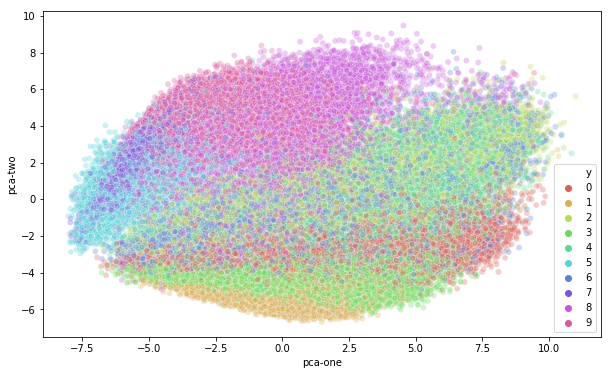

In [34]:
two_d_pca()

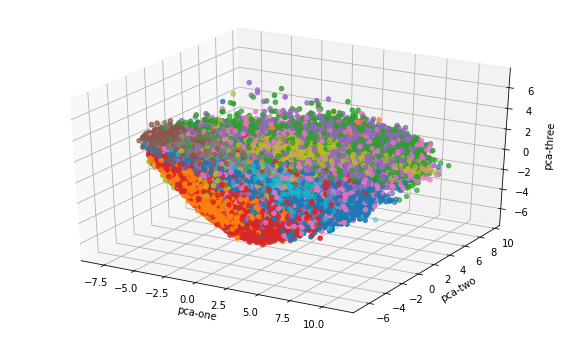

In [35]:
three_d_pca()

### 6.1.2 Showing Graph of Explained Variance vs Number of Principal Components

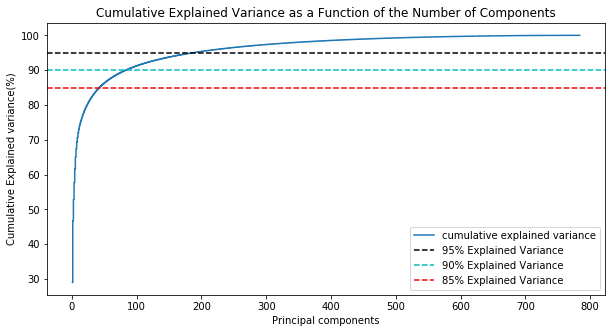

In [36]:
show_graph_EV()

### 6.1.3 Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

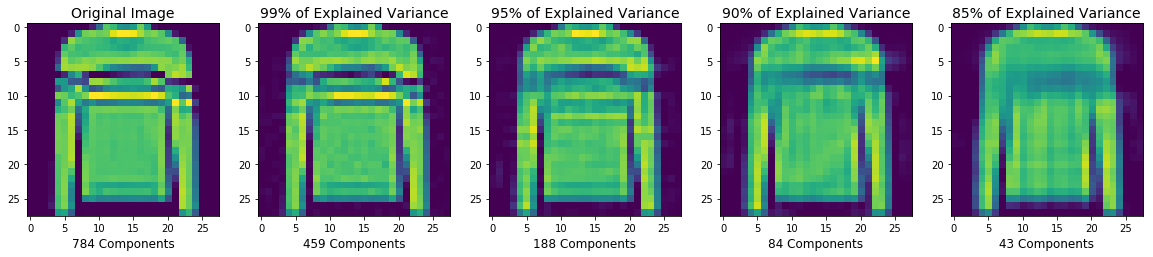

In [37]:
show_diff_graph()

## 6.2 SVD Visualization

In [40]:
# Run SVD reduction method
svd_time_start = time.time()
svd_data_train, svd_data_test,new_svd = svd_reduction(data_train,data_test,84)
print('SVD done! Time elapsed: {:.6f} seconds'.format(time.time()-svd_time_start))

SVD done! Time elapsed: 5.401151 seconds


### 6.2.1 Two and three-D representation of SVD

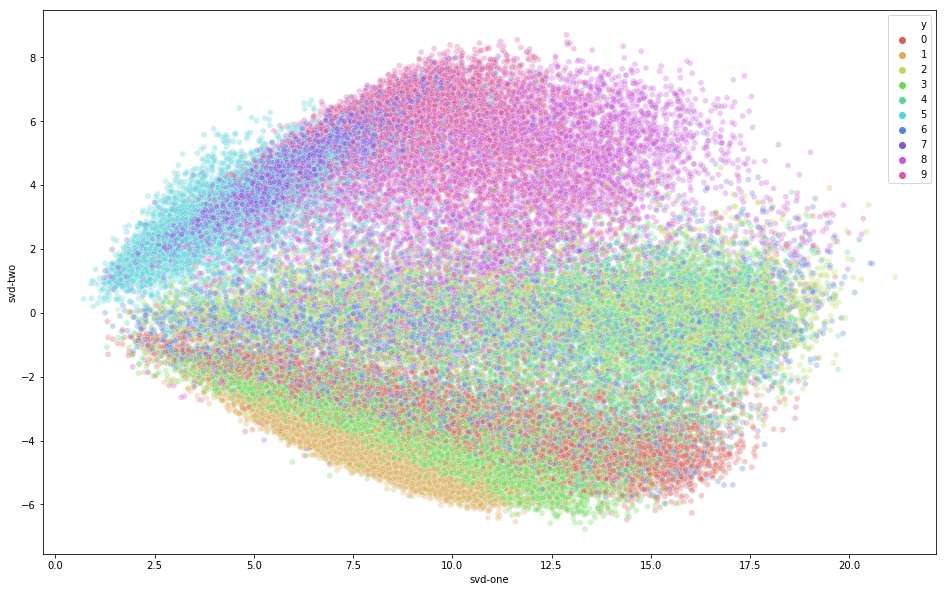

In [41]:
two_d_svd()

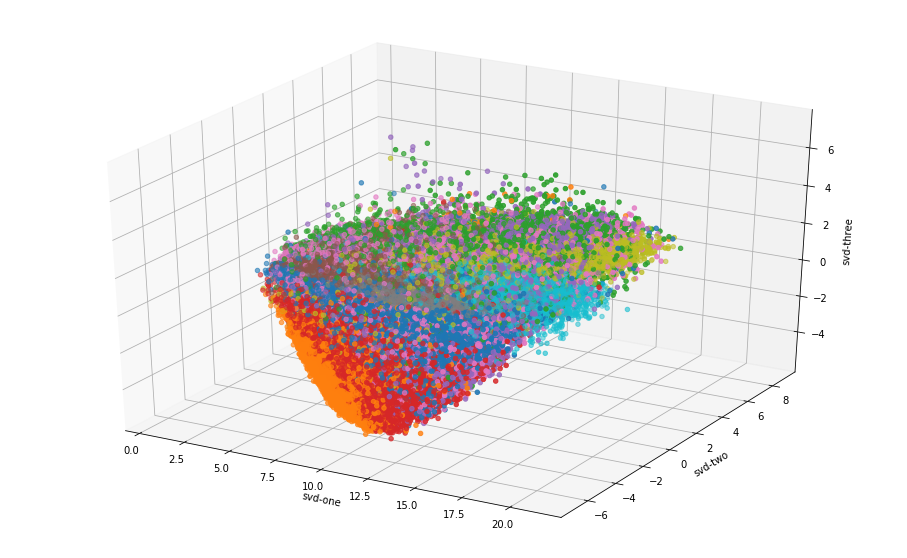

In [42]:
three_d_svd()

### 6.2.2 Compare 84 Principal Components with Original data

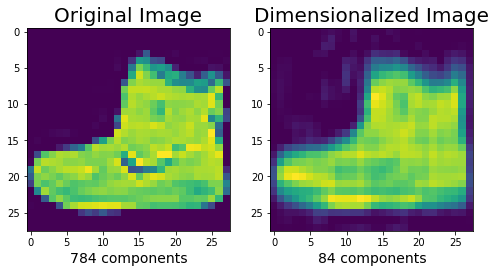

In [43]:
compare_data()

### 6.2.3 Calculating similarity of raw data(image)

In [45]:
similarity_data(new_svd) # retain 90% original data

0.9003352664876729

### 6.2.4 Compare the mean_squared_error between PCA and SVD

In [47]:
pca_mean_s = mean_squared_error(y_true = data_train.reshape(60000, 28*28), y_pred =((pca_explainedVariance(0.9, data_train)).astype('float32') / 255.).reshape(60000, 28*28))

print("The mean_squared_error of PCA is", pca_mean_s )

The mean_squared_error of PCA is 0.20489432


In [48]:
svd_mean_s = mean_squared_error(y_true = data_train.reshape(60000, 28*28), y_pred = ((svd_explainedVariance(84, data_train)).astype('float32') / 255.).reshape(60000, 28*28))

print("The mean_squared_error of SVD is", svd_mean_s )

The mean_squared_error of SVD is 0.20489456


## 6.3 Auto encoder Visualization

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0465
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0270
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0242
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0230
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0223
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0217
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0213
Epoch 8/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0209
Epoch 9/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0207
Epoch 10/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0204
Epoch 11/20
60000/6

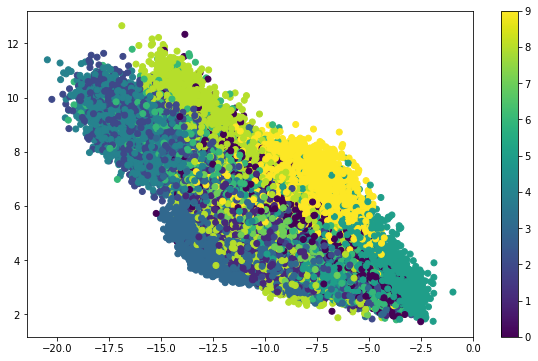

In [49]:
# Run the auto encoder method
encoded_train, encoded_test = autoencoder_reduction(data_train,data_test,84)

## 7. KNN Model and Testing

### 7.1 KNN with PCA prepressing

In [50]:
# Run the KNN 
time_start = time.time()
new_pca_knn = KNeighborsClassifier(n_neighbors=9,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=5)
knn_pca_model = new_pca_knn.fit(pca_data_train,label_train)
print('Model training time elapsed: {:.6f} seconds'.format(time.time()-time_start))

Model training time elapsed: 0.496747 seconds


In [51]:
# evaluate the model
time_start = time.time()
print(new_pca_knn.score(pca_data_test,label_test))
print('Time elapsed: {:.6f} seconds'.format(time.time()-time_start))

0.8615
Time elapsed: 23.906304 seconds


### 7.1 confusion_matrix of KNN

In [0]:
# pridect labels
knn_true = label_test
knn_pred = new_pca_knn.predict(pca_data_test)

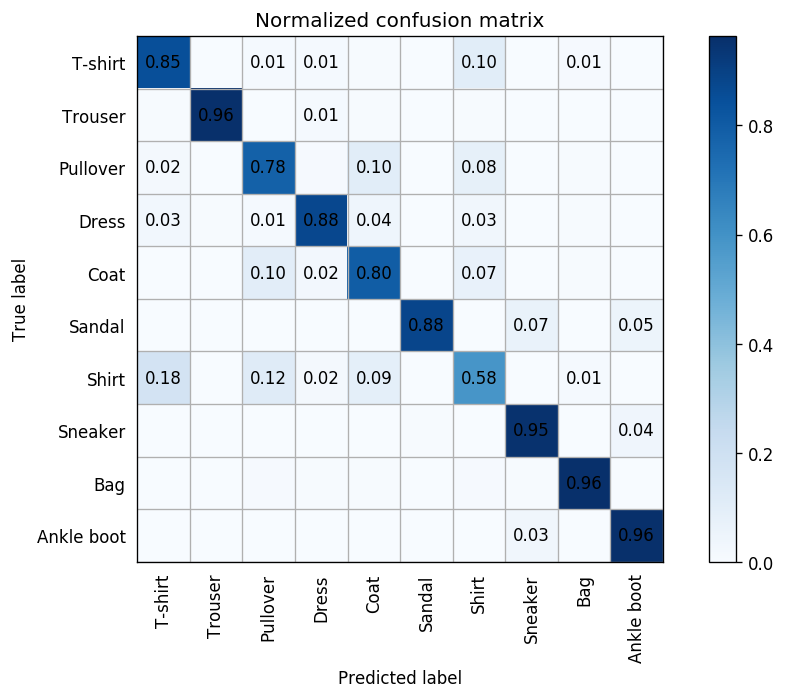

In [53]:
draw_confusion_matrix(knn_true, knn_pred)

In [55]:
print(classification_report(knn_true,knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.78      0.77      1000
           3       0.91      0.88      0.89      1000
           4       0.76      0.80      0.78      1000
           5       0.99      0.88      0.93      1000
           6       0.66      0.58      0.62      1000
           7       0.90      0.95      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.91      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## 8. Logistic Regression Model and Testing

### 8.1 LR with SVD prepressing

In [56]:
# Run the logistic regression model
new_lr_svd = LogisticRegression(C=100,class_weight=None,n_jobs=10,solver='lbfgs',verbose=1)
new_lr_svd.fit(svd_data_train,label_train)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   36.2s remaining:  2.4min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.2min finished


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=10, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [57]:
time_start = time.time()
print(new_lr_svd.score(svd_data_test,label_test))
print('Time elapsed: {:.6f} seconds'.format(time.time()-time_start))

0.8352
Time elapsed: 0.030018 seconds


In [0]:
lr_true = label_test
lr_pred = new_lr_svd.predict(svd_data_test)

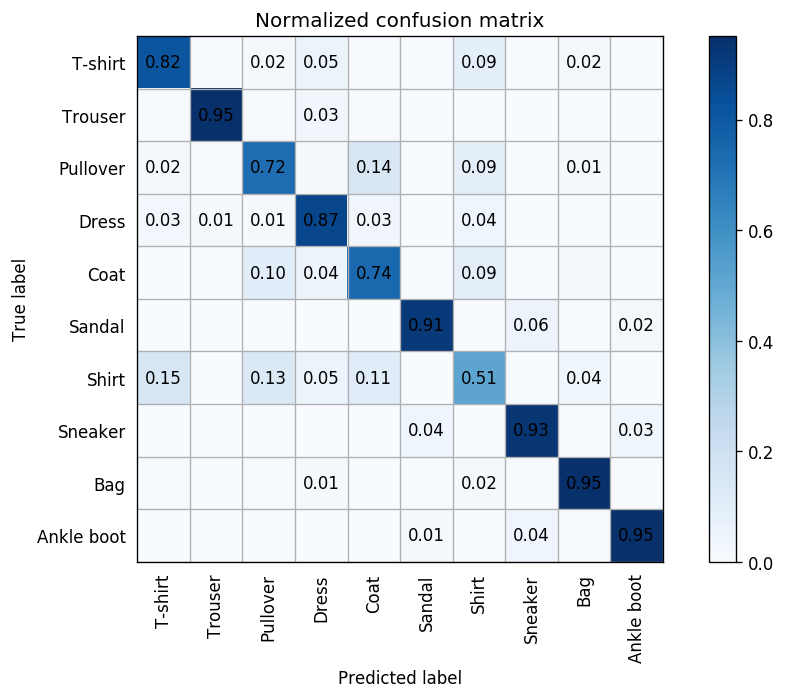

In [59]:
draw_confusion_matrix(lr_true, lr_pred)

In [60]:
print(classification_report(lr_true,lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.72      0.72      1000
           3       0.81      0.87      0.84      1000
           4       0.71      0.74      0.73      1000
           5       0.94      0.91      0.93      1000
           6       0.61      0.51      0.56      1000
           7       0.90      0.93      0.92      1000
           8       0.91      0.95      0.93      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000



## 9. Random Forest model and Testing

### 9.1 Random forest with SVD prepressing

In [61]:
rfc_svd = RandomForestClassifier(n_estimators=100, max_depth=50, n_jobs=10)
time_start = time.time()
rfc_svd.fit(svd_data_train, label_train)
print('Model training time elapsed: {:.6f} seconds'.format(time.time()-time_start))

Model training time elapsed: 73.344594 seconds


In [62]:
time_start = time.time()
print(rfc_svd.score(svd_data_test,label_test))
print('Time elapsed: {:.6f} seconds'.format(time.time()-time_start))

0.8637
Time elapsed: 0.315369 seconds


In [0]:
rfc_true = label_test
rfc_pred = rfc_svd.predict(svd_data_test)

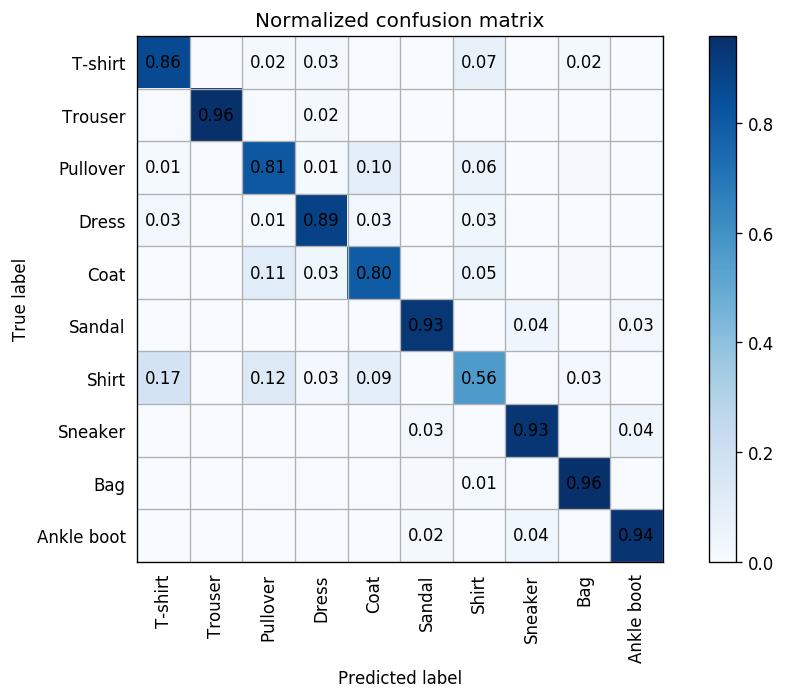

In [64]:
draw_confusion_matrix(rfc_true, rfc_pred)

In [65]:
print(classification_report(rfc_true,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.88      0.89      0.88      1000
           4       0.78      0.80      0.79      1000
           5       0.94      0.93      0.93      1000
           6       0.71      0.56      0.63      1000
           7       0.92      0.93      0.93      1000
           8       0.93      0.96      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## 10. LinearSVC

### 10.1 LinearSVC with SVD prepressing

In [66]:
# Here we choose 'ovr' for multi_class because 'crammer_singer'
# is seldom used in practice.It also rarely get better accuracy
# and is more expensive to compute. The function paramaters was 
# from cross validation result.

time_start = time.time()
linearsvc = LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=10, tol=0.0001, verbose=0)
linearsvc.fit(svd_data_train,label_train)
print('Model training time elapsed: {:.6f} seconds'.format(time.time()-time_start))

Model training time elapsed: 107.253557 seconds


In [67]:
time_start = time.time()
print(linearsvc.score(svd_data_test,label_test))
print('Time elapsed: {:.6f} seconds'.format(time.time()-time_start))

0.8368
Time elapsed: 0.014411 seconds


In [0]:
linearsvc_true = label_test
linearsvc_pred = linearsvc.predict(svd_data_test)

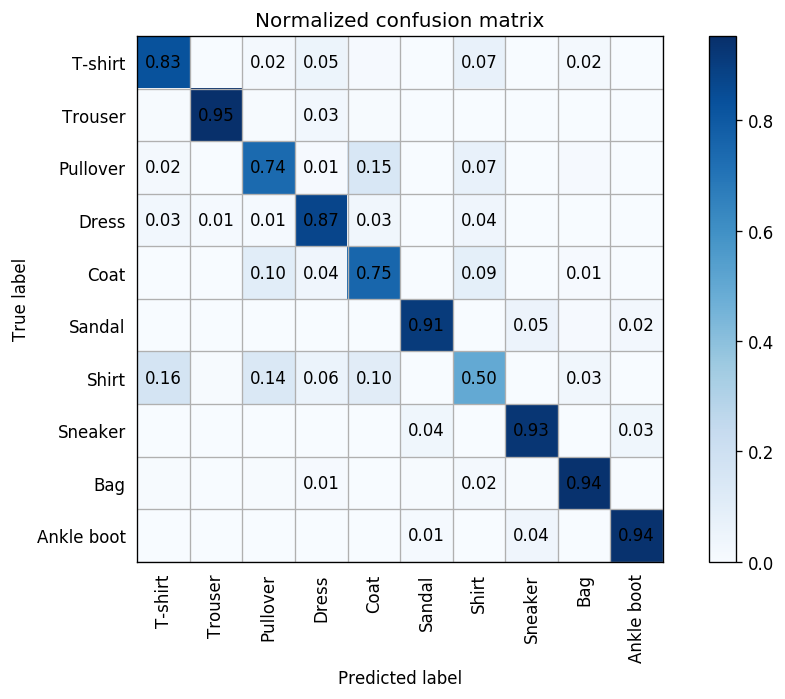

In [69]:
draw_confusion_matrix(linearsvc_true, linearsvc_pred)

In [70]:
print(classification_report(linearsvc_true,linearsvc_pred)) # classification report

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.74      0.73      1000
           3       0.81      0.87      0.84      1000
           4       0.72      0.75      0.73      1000
           5       0.94      0.91      0.92      1000
           6       0.63      0.50      0.56      1000
           7       0.90      0.93      0.91      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000

